# Problems 6 - Regularisation

## 6.1 Overfitting and Underfitting

For each of the following situations, say if the model has underfit, overfit or fit the data well.

(a) ![Over/Underfitting 1](OverUnder_1.png)

---

*Your Answer Here*

---


(b) ![Over/Underfitting 2](OverUnder_2.png)

---

*Your Answer Here*

---


(c) ![Over/Underfitting 3](OverUnder_3.png)

---

*Your Answer Here*

---


(d) ![Over/Underfitting 4](OverUnder_4.png)

---

*Your Answer Here*

---


## 6.2 Overfitting and Underfitting \#2

For each of the following situations, say if the model has underfit, overfit or fit the data well.

(a) ![Classification Over/Underfitting 1](OverUnderC_1.png)

---

*Your Answer Here*

---


(b) ![Classification Over/Underfitting 2](OverUnderC_2.png)

---

*Your Answer Here*

---


(c) ![Classification Over/Underfitting 3](OverUnderC_3.png)

---

*Your Answer Here*

---


(d) ![Classification Over/Underfitting 4](OverUnderC_4.png)

---

*Your Answer Here*

---


## 6.3 Improving the fit - Classification (Logistic Regression)

Suppose you are fitting a logistic regression classifier: $f(x) = g(w_0+w_1 x_1 + w_2 x_2)$ on the dataset below.


|$x_1$ | $x_2$ | $y$ |
|-|-|-|
| 1 | 4 | 1 |
| 2 | 1 | 1 |
| 3 | 3 | 0 |
| 4 | 4 | 1 |

Plotting these data looks like this:

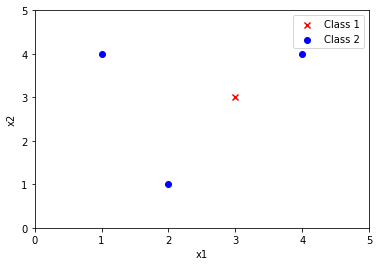

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.array([1, 2, 3, 4])
x2 = np.array([4, 1, 3, 4])
y = np.array([1, 1, 0, 1])
plt.scatter(x1[y==0], x2[y==0], marker='x', c = 'red',  label='Class 1')
plt.scatter(x1[y==1], x2[y==1], marker='o', c = 'blue', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((0,5))
plt.ylim((0,5))
plt.legend()

Propose a way to increase how well we can fit the training data.

---

*Your Answer Here*

---


## 6.4 Improving the fit - Regression

Suppose you are fitting a linear regression model: $f(x) = w_0+w_1 x_1$ on same training set as in last week.

In [2]:
import numpy as np

# This is a single feature, with 50 data points
feat = np.array([ 3.69, -0.01,  3.92,  3.76,  4.77,  2.65, -3.2 , -3.68,  4.84, 2.35, -3.46,  3.36,  0.05, -2.43,  4.5 ,  2.99, -4.58, -2.38,
        4.75, -0.99,  2.43,  1.03, -0.91,  0.49, -1.07, -4.56,  2.7, -1.89, -4.46, -3.22,  4.11, -1.4 , -2.15, -3.08,  1.22,  4.15,
       -3.32, -0.96,  2.28, -0.22,  1.63, -3.16,  0.57,  1.12,  0.46, -4.42, -1.98, -4.59, -3.27,  3.77])

# And this is the output for each of the 50 data points
out = np.array([ -4.01526321,   4.91472839,  -6.45656423,  -2.62612898, -8.51413128,   3.34151409,  12.88771229,  34.65904607,
       -13.35431265,   4.30981981,  21.88485042,   1.12385015, -2.91774249,  14.50057692,  -1.24198533,  -4.55757528,
        45.46247156,   8.26033485, -17.30334323,  -9.70654351, -11.24523311, -10.24578944,   2.52139723,   9.46442395,
        -2.6732785 ,  47.77493771,  -1.3560507 ,  -3.87657515, 47.12672411,  19.07990287,  -0.9455647 ,   0.35427309,
         9.80390966,  19.42353943,   3.11970979,   3.44865065, 21.42035593,  -7.88242488,   5.64544367,  10.20227577,
        -0.62195752,  14.75901715,   9.12831525,   7.21057155, 4.53708356,  45.98559999,  -3.86594125,  50.79311745, 25.99250789,  -3.46524068])

Plotting these data looks like this:

Text(0, 0.5, 'Observed y (output)')

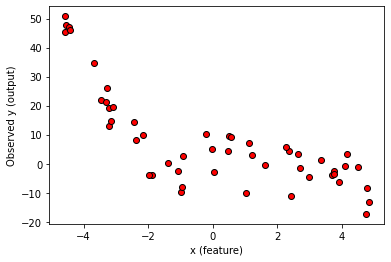

In [3]:
plt.scatter(feat, out, marker = 'o', edgecolor = 'black', c = 'red')
plt.xlabel('x (feature)')
plt.ylabel('Observed y (output)')

Let's redefine our function `map_feature()` for generating polynomial features. Remember that we also normalise our data inside the same function. If we do so, we should keep the mean and standard deviation values we used for the normalisation, as we might need to use them again later on, with new data. Therefore, we **return** the mean and standard deviation values we calculated so that they can be saved for future use.

In addition, we made the mean and standard deviation variables into **arguments** of this function, that have a default value of an empty array. This way we can check what these arguments are everytime. If we are given nothing (therefore these are empty arrays), we will calculate the means and standard deviations inside our function and use them for the normalisation. If we are given something, then we will use the values we are given for normalization. This way we provide a neat mechanism to tell the function how to normalise each time.

In [4]:
def map_feature(x, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a new feature vector comprising of
    1, x, x^2, x^3, ..., x^degree
    '''
    
    x = x.reshape(-1, 1) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    
    DesignMatrix = np.ones_like(x) # start with a column of ones
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

We will also redefine our `GradientDescent_np()` for running the Gradient Descent algorithm.

In [5]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,w) - y)) / m;
        w = w - alpha*grad
        J[iteration] = sum( (np.dot(X,w) - y)**2) / m
    return [w, J]

Now, let's recover what we did in the last session. We will try polynomials of different degrees on our data, and see how the fit changes. In order to be easier to see, instead of running the code many times, we will do a figure with a few subplots.

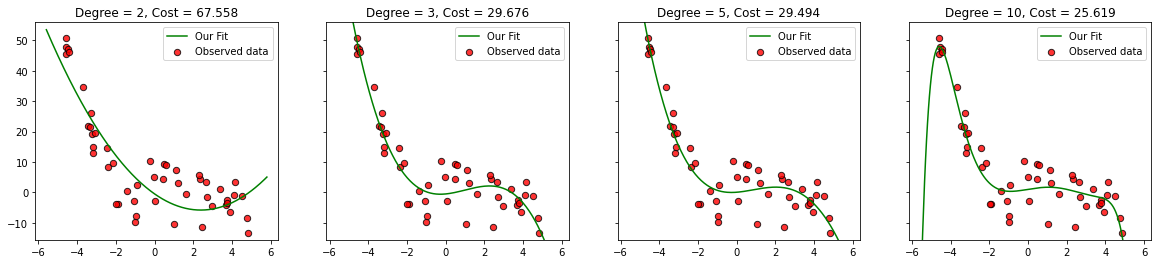

In [6]:
degreeRange = [2, 3, 5, 10] # Define the list of degrees we want to try out

fig, ax = plt.subplots(1, len(degreeRange), sharey = True, figsize = (20,4)) # Create a row of as many subplots as degrees we want to check

for deg, axis in zip(degreeRange, ax): # The zip() function "zips" two lists together, and creates a new list of tuples. See https://docs.python.org/3/library/functions.html#zip
    x_norm, means, stds = map_feature(feat, degree = deg) # Generate features up to the corresponding degree

    w, J = GradientDescent_np(x_norm, out, alpha = 0.1, max_iterations=2000) # run our Gradient Descent

    # plot our FIT
    x = np.arange(min(feat)-1, max(feat)+1, 0.05)    
    x_out, means, stds = map_feature(x, degree = deg, preCalcMeans=means, preCalcStd=stds) # Generate features from the new inputs, using the same means and STDs like before
    y_out = x_out @ w #np.dot(x_out, w) # Note how easy is to calculate the output of our model by doing a simple matrix - vector multiplication. Last time we wrote this by hand using a for loop
    axis.plot(x, y_out, color='green', label='Our Fit') # Note that instead of plt. we use axis. This is in order to tell matplotlib to draw inside the current subplot. See https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.subplots.html

    #plot the data
    axis.scatter(feat, out, s=40, c='red', edgecolor = 'k', linewidth = 1, label='Observed data', alpha = 0.8)
    
    axis.legend() # Show a legend, with all the "labels" we have provided
    axis.set_ylim(0.9 * min(out), 1.1 * max(out))
    
    # Add a title to our subplot that explains what it is
    axis.set_title('Degree = {0}, Cost = {1}'.format(deg, '%.3f' % J[-1])) # The % operator of a string is called the formatting operator. Read here for details: https://docs.python.org/2/library/stdtypes.html#string-formatting

<font color='blue'>Can you calculate how big are our weights in each case, and add this information in the title? To do that calculate the sum of the squares of the weights.</font>

<font color='blue'>What do you expect? What do you observe?</font>

In [7]:
# YOUR CODE HERE


---

*Your Answer Here*

---


Instead of trying to control the complexity of the model (by changing the number of degrees), we said we could use a complex model, but introduce regularization to control the complexity of the fit (how smooth of wiggly the curve will be).

Let's change our Gradient Descent algorithm, to add this regularisation term. This implies adding a term in the cost that corresponds to $\lambda \sum_{i=0}^n(\theta_i^2)$ or else $\lambda\bf{\Theta}^T\Theta$. This means that in the calculation of gradient descent we should add the derivative in respect to $\theta_i$ which would be $2\lambda\theta_i$.

The parameter $\lambda$ is the regularization coefficient. The bigger it is, the more important this new term is (and the smoother our function will be). Setting this to zero, means using no regularization, so we would be reverting to the previous version of our Gradient Decent.

Remember that we do not include the bias parameter $\theta_0$ in the regularization.

In [8]:
def GradientDescent_np_withReg(X, y, max_iterations=100, alpha=1, lam = 1):
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        w_copy = w.copy()
        w_copy[0] = 0 # ignore the bias term in the regularisation
        grad = (np.dot(X.T , (np.dot(X, w) - y)) + 2 * lam * w_copy)/ m;
        w = w - alpha*grad
        J[iteration] = (sum( (np.dot(X, w) - y)**2) + lam * sum(np.dot(w_copy.transpose(), w_copy))) / m        
    return [w, J]

<font color='blue'>Now can you do the same like before but instead of trying different models (different degrees), let's fix the model to a 10 degrees one, and try different values for lambda: [0, 0.01, 0.1, 1].</font>

<font color='blue'>What do you expect? What do you observe?</font>

In [9]:
# YOUR CODE HERE #


---

*Your Answer Here*

---
